# Palmer Penguins

***

![Penguins](https://miro.medium.com/v2/resize:fit:786/format:webp/0*V1ED9g49d51KpYv9.png) 

The **Palmerpenguin** dataset is used in exploration and visualisation of data, offering an alternative to a highly over used Iris dataset.
It was collected by by Allison Horst, Alison Hill, Dr Kristen Gorman at the Palmer Station in Antarctica.  

 This dataset is available for more exploration [on Github](https://allisonhorst.github.io/palmerpenguins/).

 It contains two datasets, one called *penguins* and the other called *penguins_raw*.
 
 [Penguins](https://allisonhorst.github.io/palmerpenguins/reference/penguins.html) is a simplified version of the raw data that consists of 7 columns and 344 rows. It includes measurements for penguin species, island in Palmer Archipelago, size (flipper length, body mass, bill dimensions), and sex.

 [Penguins_raw](https://allisonhorst.github.io/palmerpenguins/reference/penguins_raw.html) includes nesting observations, penguin size data, and isotope measurements from blood samples for adult Adélie, Chinstrap and Gentoo penguins.



### Libraries
***
We need to import Python libraries.
- Pandas - for data manipulation and analysis. It allows us to investigate CSV files, amongst other features.

- Matplotlib - for data visualisation and graphical plotting

- Seaborn - built on top of matplotlib with similar functionalities

- Numpy - to perform  wide variety of mathematical operations on arrays

- Warnings - to manipulate warnings details

In [1]:

# Data frames.
import pandas as pd

# Plotting
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

#Numerical arrays
import numpy as np

# Warning package to ignore warning messages
import warnings
warnings.filterwarnings("ignore")


### Load Data
***

Load the palmer penguins data set from a URL.


In [2]:
# Loading the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")


### Read in the Data
***

In [3]:
# Reading in the dataset
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Inspect Data
***

In [4]:
# Information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Column Definition
***

The dataset consists of 7 columns.

**species**, a factor denoting penguin species (Adélie, Chinstrap and Gentoo)

**island**, a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or 
Torgersen)

**bill_length_mm**, a number denoting bill length (millimeters)

**bill_depth_mm**, a number denoting bill depth (millimeters)

**flipper_length_mm**, an integer denoting flipper length (millimeters)

**body_mass_g**, an integer denoting body mass (grams)

**sex**, a factor denoting penguin sex (female, male)



In [5]:
# Statistical analysis the dataset.
df.describe ()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


- The mean length for bill length is 43.92mm
- The mean depth for bill depth is 17.15mm
- The mean length for flipper length is 200.91mm
- The mean mass for the body is 4201.7g


### Data Cleaning
***
We need to check for any missing data


In [6]:
# We use .null to find the missing values
print(df.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


There are 5 columns with Null values.
- bill_lentgh_mm
- bill_depth_mm
- flipper_length_mm
- body_mass-g
- sex

Then we drop the rows with Null values.

In [7]:
# Dropping null values.
df.dropna(inplace = True)


In [8]:
# Let's check for null values again
print(df.isnull().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


No null values left.

### Analysing the data visually
***

In [10]:
# Check for Data Types
print(df.dtypes)


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


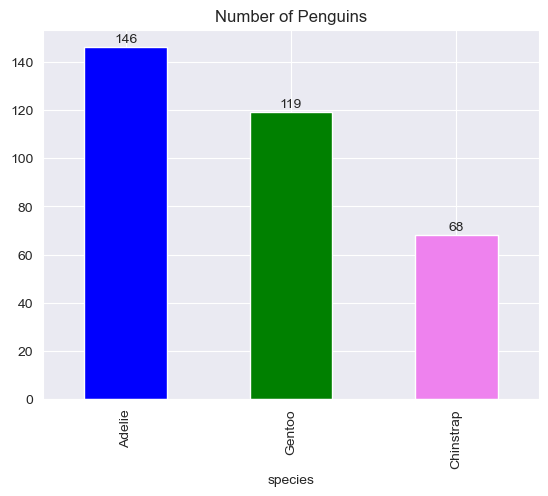

In [43]:
#Bar plot for the number of penguins per island
color = ['blue', 'green','violet']
df['species'].value_counts().plot(kind='bar', color = color)
plt.title('Number of Penguins')

 #Add labels
counts = df['species'].value_counts()
for i, count in enumerate(counts):
   plt.text(i, count +1, str(count), ha= 'center', va = 'bottom')
   

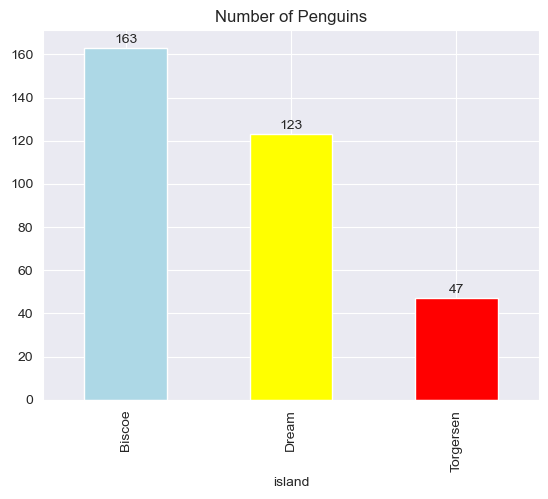

In [44]:
# Bar plot for the number of penguins per species

color = ['lightblue', 'yellow','red']
df['island'].value_counts().plot(kind='bar', color = color)
plt.title('Number of Penguins')

# Add labels
counts = df['island'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count +1, str(count), ha= 'center', va = 'bottom')



### Classification dataset
***
In classication dataset we can predict the penguin's species using anatomical features.

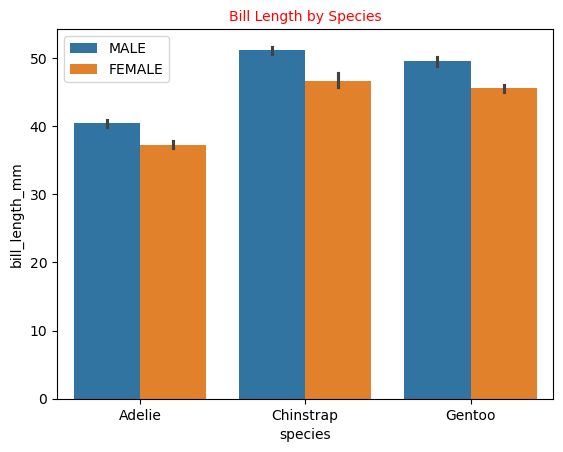

In [11]:
sns.barplot(x = "species", y = "bill_length_mm", data = df, hue = "sex")
plt.title("Bill Length by Species", size = 10, color = "red")
plt.legend()


The Chinstrap species can be differentiated from the Adelie and Gentoo by their longer bill length.

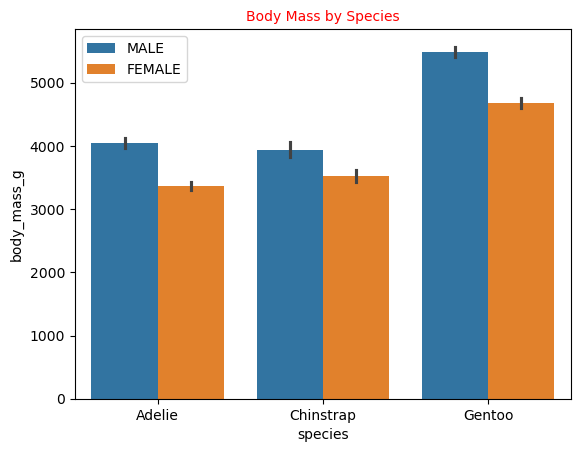

In [12]:
sns.barplot(x = "species", y = "body_mass_g", data = df, hue = "sex")
plt.title("Body Mass by Species", size = 10, color = "red")
plt.legend()


Text(0.5, 1.0, 'Flipper Length')

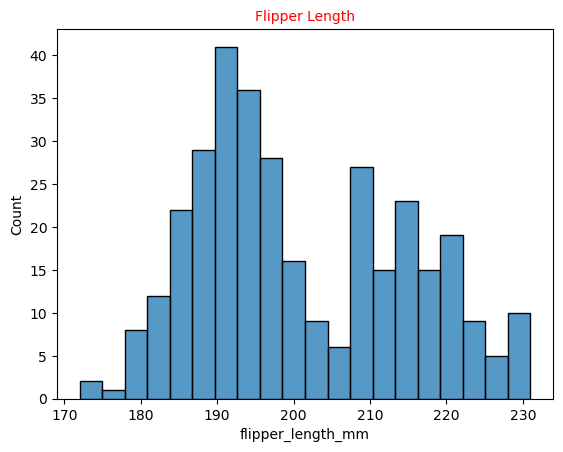

In [13]:
sns.histplot(x = "flipper_length_mm", data = df, binwidth = 3)
plt.title("Flipper Length", size=10, color="red")


### Exploratory Data Analysis (EDA)
***
EDA examines the potential correlations among variables. The coefficient value of  correlation 
is in between -1 and 1.

- ±0.81 to ±1.00  = Very strong positive/negative correlation
- ±0.61 to ±0.80  = Strong positive/negative correlation
- ±0.41 to ±0.60  = Moderate positive/negative correlation
- ±0.21 to ±0.40  = Weak positive/negative correlation
- ±0.00 to ±0.20  = Negligible correlation


#### Flipper Length  vs body mass Correlation
***


Text(0.5, 1.0, 'Flipper Length vs Body Mass')

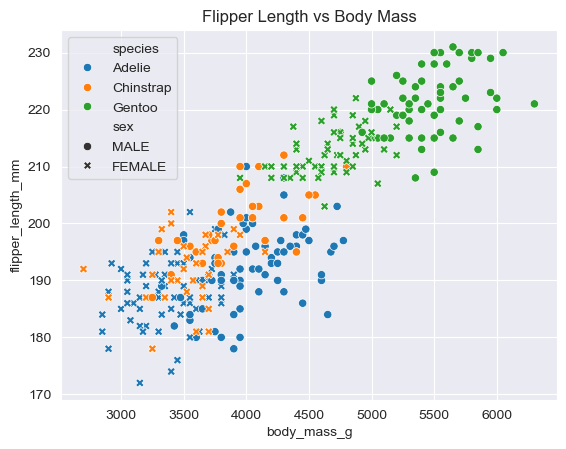

In [14]:
# Flipper length vs body mass plot

sns.set_style('darkgrid')
sns.scatterplot(x = "body_mass_g", y = "flipper_length_mm", data = df, hue = ("species"), style = ("sex") )

# Title.
plt.title('Flipper Length vs Body Mass')



From the scatter plot above, we can observe that we have a linear relationship between the flipper length and the body mass. The longer the flipper of a penguin, the heavier the penguin.
The Gentoo species is the most heaviest of the three species.

For mathematical calculation we only need numerical variables( bill length, bill depth, flipper length and body mass). We must drop the non numerical variables (species, island, and sex)

In [45]:
#Correlation coefficient to asses the relationship between variables.

#We must first drop the non mumerical columns
df = df.drop(["species"], axis = 1)
df = df.drop(["island"], axis = 1)
df = df.drop(["sex"], axis = 1)

#To make it easy to read the relationship we round the values to two digits
df.corr().round (2)



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


Text(0.5, 1.0, 'Correlation Matrix')

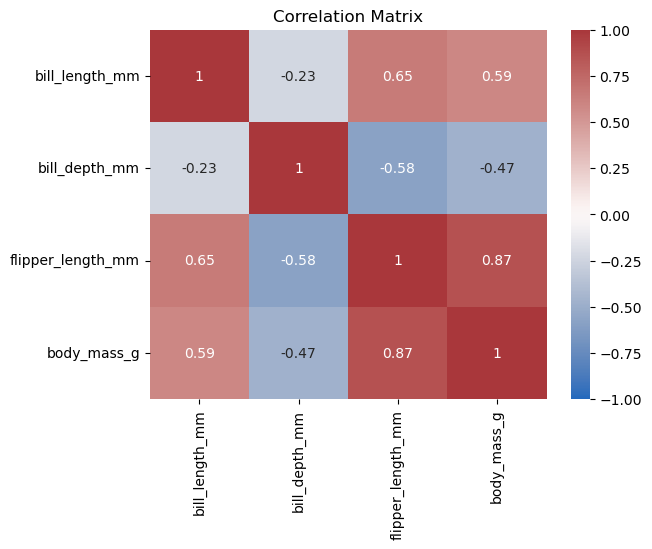

In [ ]:
# Let's plot the correlation matrix map.

matrix = df.corr().round (2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title("Correlation Matrix")


A negative coefficient tells us that the relationship between the variables is negative, meaning that when one value increases, the other decreases. Similarly, a positive coefficient indicates that when one value increases, so does the other.

1.Bill Length vs. Bill Depth: Weak negative correlation (r = -0.23)

- This implies that as bill length increases, there is a slight tendency for bill depth to decrease, although the correlation isn’t particularly strong.

2.Bill Length vs. Flipper Length: A robust positive correlation (r = 0.6562).

- This indicates that as bill length increases, there is a significant tendency for flipper length to also increase.

3.Bill Depth vs. Flipper Length: A Moderate negative correlation (r = -0.5839).

- This suggests that as bill depth increases, there is a moderate tendency for flipper length to decrease.

### Refferences
***
1. https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95

   Highlights how penguin dataset can be used to demonstrate different data concepts, e.g. correlation, regression,and classification.

2. https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook
   
   The use of palmerpenguin dataset as a replacement for Iris dataset 

3. https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn/notebook#Bar-Plot

   How to visualize the penguin dataset using seaborn.

4. https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples/
  
   How to plot a scatter plot in Seaborn. 

5. https://seaborn.pydata.org/generated/seaborn.scatterplot.html

6. https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html

   The use of penguin dataset for classification and regression problems 

7. https://www.hackersrealm.net/post/iris-dataset-analysis-using-python

   Classification techniques and machine learning algorithms to analyze and classify Iris flowers based on their features.

8. https://medium.com/@hakeemsalaudeen01/exploring-the-size-relationships-in-penguins-a-correlation-analysis-using-python-4ef97d809a2

   Comprehensive analysis of penguin data using Python, with a specific focus on understanding the relationships between different size-related attributes of penguins.

9. https://datagy.io/seaborn-heatmap/
 
   How to use Seaborn to create beautiful and informative heatmaps using the sns.heatmap() function.

10. https://datagy.io/python-seaborn/
   
    How to use the Python Seaborn library to create attractive data visualizations.


# End
***